# <center> AWS-foryou </center>
### <center> examples </center>
---

### Example 1
Running sklearn_diabetes.py which contains the user's algorithm.

In [5]:
import boto3
import numpy as np
import os
import pandas as pd
from sklearn import datasets
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import time

os.chdir("..")

from awsforyou import aws_foryou
import examples.sklearn_diabetes as sdb

Using TensorFlow backend.


In [6]:
# writing the csv files for x and y (data_loc and target_loc respectively)
# datasize is 3 times larger than the standard diabetes dataset
x,y = sdb.get_diabetes(3)

In [7]:
# assign the locations of csv files
data_loc = './examples/x_diabetes.csv'
target_loc = './examples/y_diabetes.csv'

For the purpose of this example, a dummy scripy is created.
The script does the following:
1. fits linear regression to the diabetes data
2. finds the best SVR model hyperparameters through grid search
3. Reduces the dimension of the dataset through PCA
4. finds the best SVR model hyperparameters again through grid search
5. returns the best model and the respective parameters

In [4]:
# running the script without aws_foryou

start = time.time()
best_model = sdb.run_sklearn_diabetes(data_loc, target_loc)
finish = time.time()
runtime = finish - start
print("runtime is %f seconds" % runtime)
print("best model is \n %s" % best_model)

linear regression score = 0.189382
best hyperparameters estimate from grid search = 
 SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) 
score from using best hyperparameters = 0.217661
begining 6-components PCA decomposition
percentage of variance explained = 0.774004
repeat grid search with PCA-transformed data
best hyperparameters estimate from grid search = 
 SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) 
score from using best hyperparameters = 0.214275
runtime is 220.557909 seconds
best model is 
 SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


Our script, aws_foryou, takes in two arguments.  
1. The string which is used to call your script. In this case:
```python
"run_sklearn_diabetes(data_loc='examples/x_diabetes.csv', target_loc='examples/y_diabetes.csv')"
```  

2. The module the function being called is found in. In this case:
```"examples.sklearn_diabetes"```

Putting them together, the command used to execute our script is:  
```python
aws_foryou.aws_foryou("run_sklearn_diabetes(data_loc='examples/x_diabetes.csv', target_loc='examples/y_diabetes.csv')", "examples.sklearn_diabetes")
```
This will write a html file and return a dataframe. The returned dataframe is assigned to ```df``` in this case

In [6]:
# running the script with aws_foryou

df = aws_foryou.aws_foryou("run_sklearn_diabetes(data_loc='examples/x_diabetes.csv', target_loc='examples/y_diabetes.csv')", "examples.sklearn_diabetes")

linear regression score = -0.146835
best hyperparameters estimate from grid search = 
 SVR(C=5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False) 
score from using best hyperparameters = 0.315438
begining 6-components PCA decomposition
percentage of variance explained = 0.830719
repeat grid search with PCA-transformed data
best hyperparameters estimate from grid search = 
 SVR(C=5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False) 
score from using best hyperparameters = 0.304803
point 1, iteration 1 complete.
linear regression score = -0.146835
best hyperparameters estimate from grid search = 
 SVR(C=5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False) 
score from using best hyperparameters = 0.315438
begining 6-components

Opening the html file lets you browse the results of the prediction.

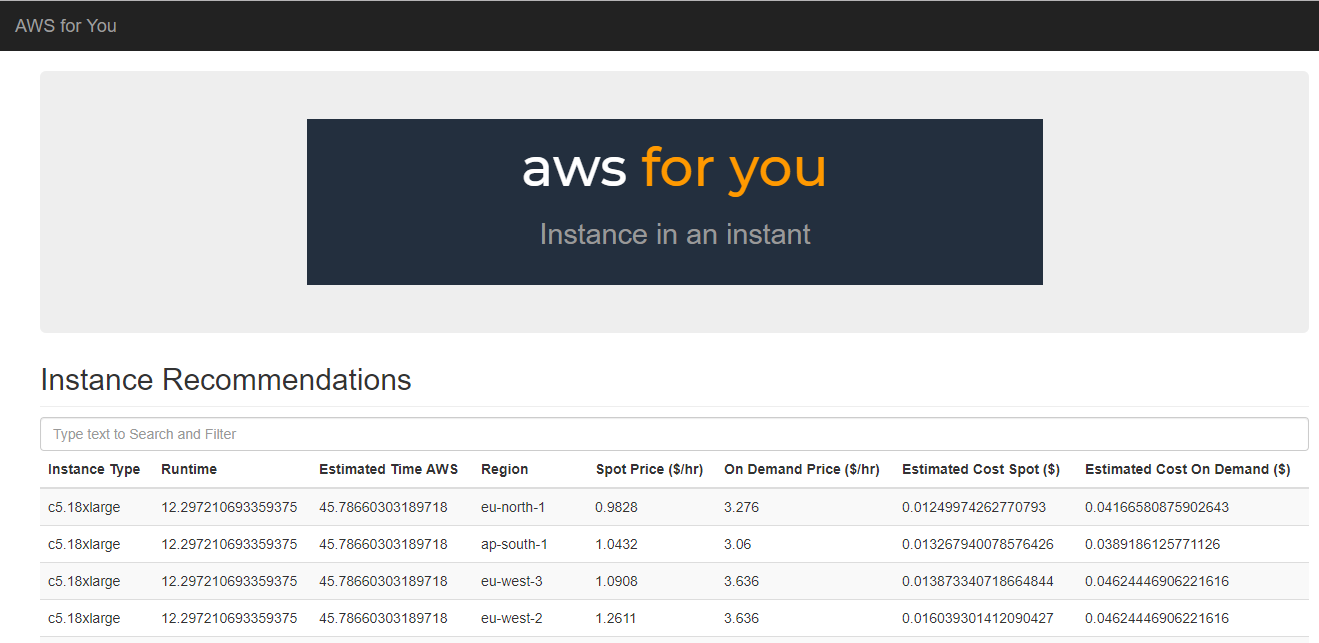

In [10]:
from IPython.display import Image
Image("examples/html-table-snip.png")